# Heart Disease visualisation & Prediction(for those who are lazy) with AutoML(pycaret)

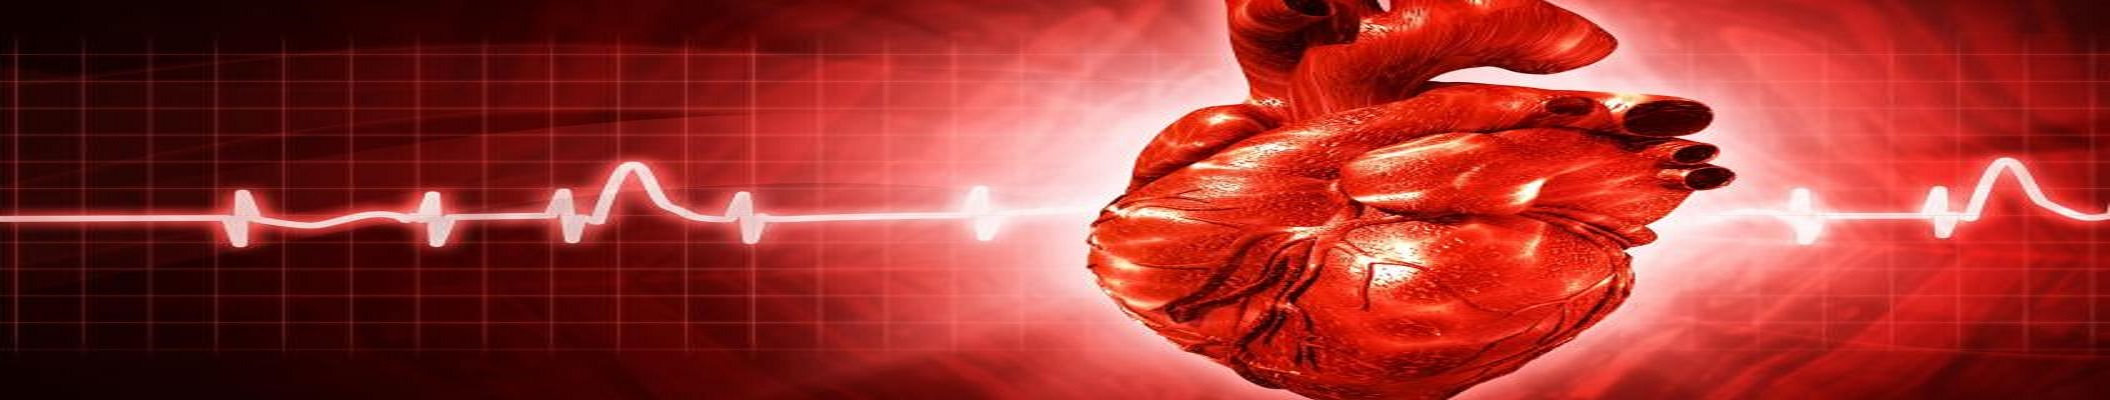

# 1. What you will get from this notebook

This is bit different from the usual Kaggle works you will see, where most of the others are building the model using the row or can be say as the traditional method. As in this method a large amount of time is wasted in data pre-processing, feature selection, model selection, hyperparameter tuning etc. But now days there are many AutoML which can be easily pip installed and can be used. Many time-consuming works can be easily done with a couple of codes. Most of the times the model accuracy will be greater than the model made by the traditional method.

**This is for those who need a highly accurate, perfect model, with less headache.**

**This is not for those who are trying to study the models deeply.**

# 2. Installing necessary packages

In [ ]:
#The AutoML we are using here is pycaret, this is the step to install pycaret.
!pip install pycaret

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data visualisation 
import seaborn as sns #Data visualisation 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# 3. Getting the data

In [ ]:
# Getting the dataset to "dataset" variable
dataset = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [ ]:
# Showing first 5 rows.
dataset.head()

# 4. Attribute Information:

It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [ ]:
dataset.shape

## Checking the data is balanced or not

### As we can see 45% & 54% is a balanced data.

In [ ]:
countNoDisease = len(dataset[dataset.target == 0])
countHaveDisease = len(dataset[dataset.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(dataset.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(dataset.target))*100)))

# 5. Visualisation 

In [ ]:
sns.countplot(x="target", data=dataset, palette="bwr")
plt.show()

In [ ]:
sns.countplot(x='sex', data=dataset, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dataset.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dataset.sex))*100)))

In [ ]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(30,15))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [ ]:
pd.crosstab(dataset.sex,dataset.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
pd.crosstab(dataset.slope,dataset.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(dataset.fbs,dataset.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
pd.crosstab(dataset.cp,dataset.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# 6. Preparing the data for model selection

In this step we are splitting the dataset into two. The first part contains 95% of the data that is used for training and testing. The remaining 5% is stored and is used to try out with the final model we deployed (This data is named as unseen data).

In [ ]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

# 7. Imporing pycaret classification method

In [ ]:
# Imporing pycaret classification method
from pycaret.classification import *

# This is the first step of model selection
# Here the data is our dataset, target is the labeled column(dependent variable), section is is random number for future identification.
exp = setup(data = data, target = 'target', session_id=1,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95 )

# After this we will get a list of our columns and its type, just conferm they are the same. Then hit enter.

# 8. Comparing the models

In [ ]:
#This comand is used to compare different models with our dataset.
#The acuuracy,F1 etc of each model is listed in a table.
#Choose which model you want
compare_models()

In the above table we can see 6 models is showing accuracy of 100%(i.e. 1). For this notebook we use Naive Bayes.

Codes for different models are given below.

Logistic Regression ‘lr’

K Nearest Neighbour ‘knn’

Naives Bayes ‘nb’

Decision Tree ‘dt’

SVM (Linear) ‘svm’

SVM (RBF) ‘rbfsvm’

Gaussian Process ‘gpc’

Multi Level Perceptron ‘mlp’

Ridge Classifier ‘ridge’

Random Forest ‘rf’

Quadratic Disc. Analysis ‘qda’

AdaBoost ‘ada’

Gradient Boosting Classifier ‘gbc’

Linear Disc. Analysis ‘lda’

Extra Trees Classifier ‘et’

Extreme Gradient Boosting ‘xgboost’

Light Gradient Boosting ‘lightgbm’

Cat Boost Classifier ‘catboost’

# 9. Creating the model

In [ ]:
# With this command we are creating a Naives Byes model
# The code for Naives Byes is " nb "
# fold is the number of fold you want
lda_model = create_model('lda', fold = 10)

This table shows the accuracy and other reading for all 10 folds.

With this command we are tuning the hyperparameters. For this dataset we are already having 100% accuracy.So without tunnig will be ok.

But for other difficult dataset tunning the hyperparameters will be very usefull to increase the accuracy and other features

For unbalanced datasets we mainly look F1 score, as our dataset is balanced we can use the accuracy.

# 10. Tuning the hyper parameters

In [ ]:
tuned_lda = tune_model('lda', optimize='F1')

# 11. Ploating the ROC Curves

In [ ]:
plot_model(tuned_lda, plot = 'auc')

# 12. Confusion Matrix

Here we can see that every value is Predicted accurately. All are in true positive.

In [ ]:
plot_model(tuned_lda, plot = 'confusion_matrix')

# 13. Predicting the accuracy using the test dataset

## We get a accuracy of 0.8506 and F1 score of 0.8632


In [ ]:
predict_model(tuned_lda);

# 14. Checking with the unseen data

Initially we separated a part of the dataset as unseen data set for checking the final deployed model. Below we are checking this. The result is a data frame with Label and score. Where label is the predicted label(which species) and score is how many percentage the machine think this data is that species.

In [ ]:
new_prediction = predict_model(tuned_lda, data=data_unseen)

In [ ]:
new_prediction

# 15. Summary

As we see above, we got a hight accuracy model with 100% accuracy, with no overfitting. This is a very easy dataset that’s why we get very high accuracy. As explained, this is a very simple method to get a very high accurate model. All the works are done by the pycaret.

I am not an expert in this field, if anyone find any errors or suggestion please feel free to command below.

Mail ID : jerryjohn1995@gmail.com

**If this notebook finds interesting and useful please upvote.**